<a href="https://colab.research.google.com/github/nathalierocelle/CapstoneProject_GamAuth/blob/main/model_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import os
from os import path
import glob
import pathlib
import random

# Load the dataset

In [2]:
!git clone https://github.com/nathalierocelle/CapstoneProject_GamAuth.git

Cloning into 'CapstoneProject_GamAuth'...
remote: Enumerating objects: 593, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 593 (delta 0), reused 123 (delta 0), pack-reused 466
Receiving objects: 100% (593/593), 2.26 GiB | 41.75 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (259/259), done.


In [3]:
images_dir = '/content/CapstoneProject_GamAuth/data/images'
print('Total count of images: ', len(glob.glob(images_dir+'/*/*.png')))

Total count of images:  256


In [4]:
medicines = os.listdir(pathlib.Path(images_dir)) 
print(medicines)

['neozep_counterfeit', 'bioflu_counterfeit', 'bioflu_authentic', 'biogesic_counterfeit', 'biogesic_authentic', 'neozep_authentic']


In [6]:
train_dir = glob.glob(images_dir+'/*/*.png')

train_image = []
train_label = []
train_image_path = []

for img in train_dir:
    train_image_path.append(img)
    basename = os.path.basename(img)
    train_image.append(basename)
    train_label.append(img.split('/')[-2])

df = pd.DataFrame(list(zip(train_image,train_image_path, train_label)),columns =['image','path','label'])
df

,image,path,label
0,image_104.png,/content/CapstoneProject_GamAuth/data/images/n...,neozep_counterfeit
1,image_109.png,/content/CapstoneProject_GamAuth/data/images/n...,neozep_counterfeit
2,image_118.png,/content/CapstoneProject_GamAuth/data/images/n...,neozep_counterfeit
3,image_90.png,/content/CapstoneProject_GamAuth/data/images/n...,neozep_counterfeit
4,image_89.png,/content/CapstoneProject_GamAuth/data/images/n...,neozep_counterfeit
...,...,...,...
251,image_232.png,/content/CapstoneProject_GamAuth/data/images/n...,neozep_authentic
252,image_239.png,/content/CapstoneProject_GamAuth/data/images/n...,neozep_authentic
253,image_229.png,/content/CapstoneProject_GamAuth/data/images/n...,neozep_authentic
254,image_251.png,/content/CapstoneProject_GamAuth/data/images/n...,neozep_authentic


# Exploratory Data Analysis

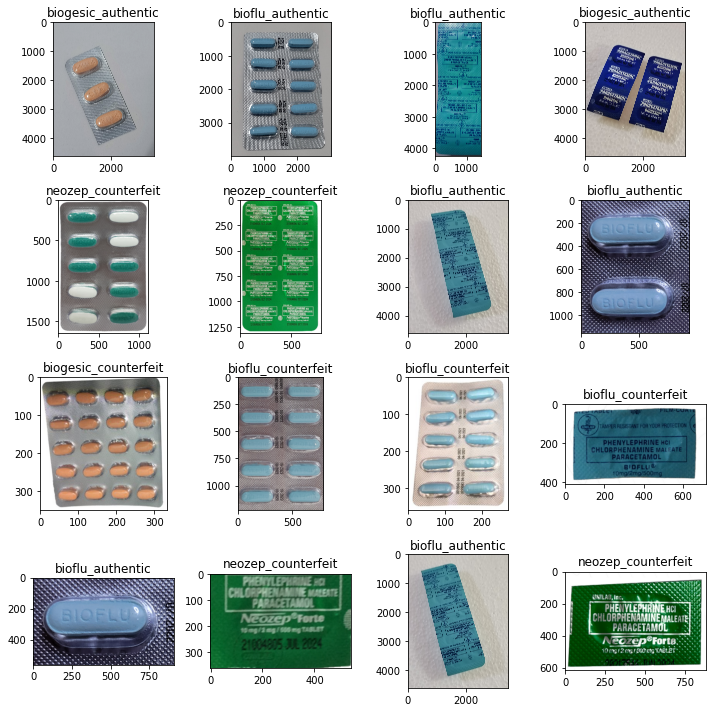

In [7]:
fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (10, 10))

for i,ax in enumerate(axes.flat):
    y = random.randrange(1,202)
    ax.imshow(plt.imread(df["path"][y]))
    ax.set_title(df["label"][y])
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

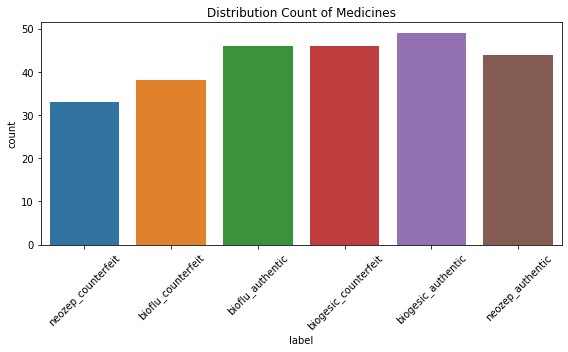

In [11]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
sns.countplot(x=df['label'], data=df).set_title('Distribution Count of Medicines')
plt.xticks(rotation=45)

# Image Preprocessing

**Convert the label from categorical into numerical**

**Perform data augmentation to increase the dataset**